In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ML/NewWorkingWithRealData

/content/drive/MyDrive/ML/NewWorkingWithRealData


In [3]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O ./cats_and_dogs_filtered.zip

--2021-06-13 04:38:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  46.4MB/s    in 1.4s    

2021-06-13 04:38:09 (46.4 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
ls

cats_and_dogs_filtered.zip  Untitled0.ipynb


In [5]:
main_folder = "./"
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [6]:
cd cats_and_dogs_filtered

/content/drive/My Drive/ML/NewWorkingWithRealData/cats_and_dogs_filtered


In [25]:
train_folder = "./train"

In [26]:
valid_folder = "./validation"

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [45]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation= "relu", input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.add(Conv2D(32, (3, 3), activation= "relu"))
model.add(MaxPooling2D(pool_size= (2, 2)))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
__________________________________________________

In [50]:
model.add(Flatten())
model.add(Dense(256, activation= "relu"))
model.add(Dense(1, activation= "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [51]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

In [52]:
model.compile(loss = "binary_crossentropy", optimizer= RMSprop(learning_rate= 0.002), metrics = ["accuracy"])

HOÀN THÀNH XÂY DỰNG MODEL

CHUẨN BỊ DATA

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
train_generator = ImageDataGenerator(rescale = 1 / 255)
valid_generator = ImageDataGenerator(rescale = 1 / 255)

In [55]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [56]:
generated_train_data

In [57]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "binary"
)

Found 1000 images belonging to 2 classes.


In [58]:
generated_valid_data

HOÀN THÀNH CHUẨN BỊ DATA

TIẾN HÀNH TRAIN MODEL

In [59]:
history = model.fit(
    generated_train_data,
    # steps_per_epoch = 8,
    batch_size = 32,
    epochs = 12,
    verbose = 1,
    validation_data = generated_valid_data,
    validation_steps = 8
)

Epoch 1/13
16/16 [==============================] - 55s 3s/step - loss: 1.1411 - accuracy: 0.4940 - val_loss: 0.6768 - val_accuracy: 0.5050
Epoch 2/13
16/16 [==============================] - 53s 3s/step - loss: 0.6854 - accuracy: 0.5595 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 3/13
16/16 [==============================] - 53s 3s/step - loss: 0.6810 - accuracy: 0.5800 - val_loss: 0.6862 - val_accuracy: 0.5860
Epoch 4/13
16/16 [==============================] - 53s 3s/step - loss: 0.6940 - accuracy: 0.5630 - val_loss: 0.7438 - val_accuracy: 0.4990
Epoch 5/13
16/16 [==============================] - 53s 3s/step - loss: 0.7294 - accuracy: 0.6030 - val_loss: 0.6409 - val_accuracy: 0.6630
Epoch 6/13
16/16 [==============================] - 54s 3s/step - loss: 0.6217 - accuracy: 0.6690 - val_loss: 0.6260 - val_accuracy: 0.6470
Epoch 7/13
16/16 [==============================] - 54s 3s/step - loss: 0.6065 - accuracy: 0.6800 - val_loss: 0.6055 - val_accuracy: 0.6620
Epoch 8/13
16/16 [==

TIẾN HÀNH DỰ ĐOÁN

In [66]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():

  #prediction progress

  path = "./" + fn
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img) /255

  x = np.expand_dims(x, axis = 0)
  #add 1 more dimension into x, which is the number of images.
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  if classes[0] > 0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog.4068.jpg to dog.4068.jpg
dog.4068.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

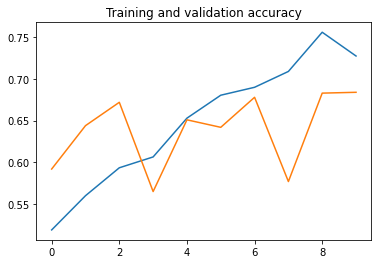

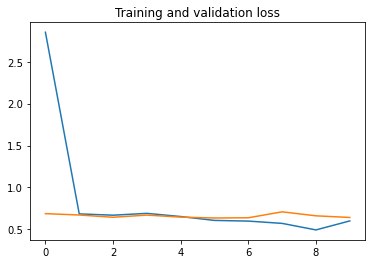

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )